<center>
<img src="logo.png" height="900"> 
</center>


#  Корреляции

В этой тетрадке мы поговорим про корреляции. 

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

Будем использовать небольшой набор данных по тому, как люди платят чаевые. 

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# новая переменная - процент чаевых от счёта
df['tip_pct'] = 100 * df['tip'] / df['total_bill']

__Посмотрим как между собой ваимосвязаны счёт, чаевые и пол клиента.__ 

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


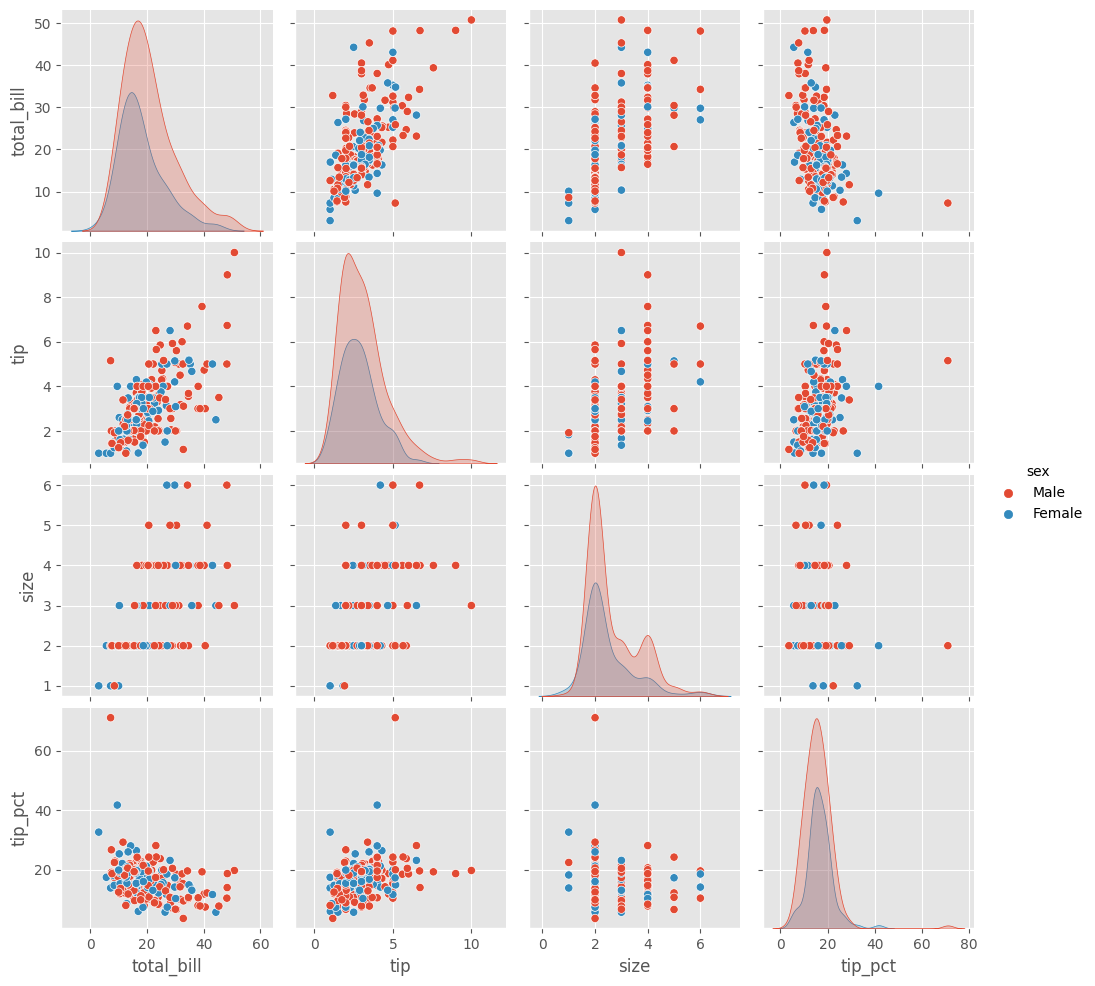

In [4]:
sns.pairplot(df, hue='sex', height=2.5, kind='scatter'); # kind = 'reg'

- Видно, что общий счёт и величина чаевых зависят друг от друга: чем больше счёт, тем больше чаевых оставляют, с долей (`tip_pct`) подобной взаимосвязи не видно 
- Пол никак не влияет на то, какое количество чаевых оставлено, красные и синие точки на графиках распределены равномерно, плотности на диагонали выглядят похожим образом. 

__Посмотрим на разбиение по дням недели.__

In [5]:
sns.catplot("day", "total_bill", "sex", data=df, kind="box", size=6);

TypeError: catplot() got multiple values for argument 'data'

- Почему-то в пятницу мужчины платят больше чаевых, чем женщины. Возможно, что это как-то связано с пятничными свиданиями и с древней традицией: счёт оплачивает мужчина. Но правда ли это так?

__Давайтте посмотрим сколько наблюдений приходится на какой день недели.__ 

In [ ]:
sns.catplot("day", "total_bill", "sex", data=df, size=6);

- Более подробный взгляд на данные показывает, что это связано не с тем, что счёт оплачивает мужчина, а с тем, что в выборке мало данных с пятницы. Из-за этого мы видим такую разницу между чаевыми. 
- В будущем мы будем говорить про статистические тесты. Они будут помогать нам отличать случайную разницу, как в этом примере, от настоящей. 

__Можно посмотреть на взаимосвязь только двух переменных.__

In [ ]:
sns.jointplot("total_bill", "tip", data=df, kind='reg');

- Снова видим, что чем больше общий счёт, тем большую сумму оставляют в качестве чаевых. Хочется провести сквозь точки линию регрессии. 

__Посмотрим на ковариационную матрицу.__

In [ ]:
df.corr(method='pearson') # Корреляция пирсона - обычная корреляция, именно ее подразумевает когда говорят о корреляции

In [ ]:
df.corr(method='spearman')

Можно визуализировать матрицу с помощью тепловой карты. 

In [ ]:
sns.set(font_scale=1.3)
plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(method='spearman'), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu");

- Видно, что корреляция Спирмэна и Пирсона не сильно отличаются друг от друга в нашем примере. Это связано с тем, что взаимосвязи в данных линейные. 

__Пример с рангами из презентации:__

Корреляция Спирмэна - это корреляция Пирсона, которую посчитали между рангами. 

In [ ]:
x = np.array([10, 8, 6, 7, 4, 10, 9, 5])
y = np.array([9, 9, 4, 5, 6, 8, 10, 7])
stats.spearmanr(x,y).correlation

In [ ]:
rx = np.array([7.5, 5, 3, 4, 1, 7.5, 6, 2])
ry = np.array([6.5, 6.5, 1, 2, 3, 5, 8, 4])
stats.pearsonr(rx,ry)[0]